In [45]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [29]:

# Đọc dữ liệu từ file vào các DataFrame
df_vn = pd.read_csv('datasets/vn_chart.csv')
df_features = pd.read_csv('datasets/audio_features.csv')

# Sử dụng phương thức merge để lọc các dòng dữ liệu trong df_features dựa trên cột ID từ df_vn
df_vn_features = df_features.merge(df_vn[['id']], on='id', how='inner')
df_vn_features = df_vn_features.drop_duplicates().reset_index(drop=True)

In [31]:
df_vn_features.head()

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,tempo,duration_ms,time_signature,explicit,popularity,release_date,album_id,album_name,track_number,preview_url
0,3rUGC1vUpkDG9CZFHMur1t,0.750,0.733,6,-3.180,0,0.0319,0.25600,0.000000,0.114,...,111.018,131872,1,True,92,2023-09-15,3UOV8XvCwMKaATRNXrYCjN,greedy,1,https://p.scdn.co/mp3-preview/ca7bdcb691fb64a5...
1,3vkCueOmm7xQDoJ17W1Pm3,0.504,0.308,9,-14.958,1,0.0321,0.86800,0.135000,0.158,...,113.950,137773,4,False,86,2023-09-15,2Cn1d2KgbkAqbZCJ1RzdkA,The Land Is Inhospitable and So Are We,7,https://p.scdn.co/mp3-preview/2f90c9a6a2b6e385...
2,5v3J1lYjtJgEM1buAa1Oe5,0.886,0.388,9,-10.874,1,0.0498,0.07670,0.012300,0.106,...,119.016,181513,4,False,52,2023-09-14,70ilvvEPW7LENYdB2Vj5rl,M.,1,https://p.scdn.co/mp3-preview/4d97d69cf58f23b8...
3,3MJhPqL2IgGs7gHEB2M35q,0.654,0.768,5,-5.007,1,0.0431,0.00616,0.000000,0.202,...,104.970,162570,4,True,72,2022-09-16,7jaSNQUBJbvfbZHLNFrV7P,BORN PINK,5,https://p.scdn.co/mp3-preview/27158b0133d5035a...
4,0wwfocY1CfXcKfMcWSoGXc,0.450,0.395,3,-7.867,1,0.0366,0.61500,0.000003,0.122,...,119.587,296000,3,False,57,2022-12-26,2C8r3XAx3RmXaEviV1ecfE,Vọng,4,https://p.scdn.co/mp3-preview/9e2317f285372db9...


In [32]:
df_vn_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                861 non-null    object 
 1   danceability      861 non-null    float64
 2   energy            861 non-null    float64
 3   key               861 non-null    int64  
 4   loudness          861 non-null    float64
 5   mode              861 non-null    int64  
 6   speechiness       861 non-null    float64
 7   acousticness      861 non-null    float64
 8   instrumentalness  861 non-null    float64
 9   liveness          861 non-null    float64
 10  valence           861 non-null    float64
 11  tempo             861 non-null    float64
 12  duration_ms       861 non-null    int64  
 13  time_signature    861 non-null    int64  
 14  explicit          861 non-null    bool   
 15  popularity        861 non-null    int64  
 16  release_date      861 non-null    object 
 1

In [33]:
# Chuyển cột release_date sang định dạng datetime
df_vn_features['release_date'] = pd.to_datetime(df_vn_features['release_date'])

In [35]:
df_vn_features["release_date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 861 entries, 0 to 860
Series name: release_date
Non-Null Count  Dtype         
--------------  -----         
861 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 6.9 KB


In [36]:
# Lọc ra các dòng chỉ trong tháng 9
start_date = '2023-09-01'
end_date = '2023-09-30'
df_vn_features_M9 = df_vn_features[(df_vn_features['release_date'] >= start_date) & (df_vn_features['release_date'] <= end_date)]

In [38]:
df_vn_features_M9.head()

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,tempo,duration_ms,time_signature,explicit,popularity,release_date,album_id,album_name,track_number,preview_url
0,3rUGC1vUpkDG9CZFHMur1t,0.750,0.733,6,-3.180,0,0.0319,0.2560,0.0000,0.114,...,111.018,131872,1,True,92,2023-09-15,3UOV8XvCwMKaATRNXrYCjN,greedy,1,https://p.scdn.co/mp3-preview/ca7bdcb691fb64a5...
1,3vkCueOmm7xQDoJ17W1Pm3,0.504,0.308,9,-14.958,1,0.0321,0.8680,0.1350,0.158,...,113.950,137773,4,False,86,2023-09-15,2Cn1d2KgbkAqbZCJ1RzdkA,The Land Is Inhospitable and So Are We,7,https://p.scdn.co/mp3-preview/2f90c9a6a2b6e385...
2,5v3J1lYjtJgEM1buAa1Oe5,0.886,0.388,9,-10.874,1,0.0498,0.0767,0.0123,0.106,...,119.016,181513,4,False,52,2023-09-14,70ilvvEPW7LENYdB2Vj5rl,M.,1,https://p.scdn.co/mp3-preview/4d97d69cf58f23b8...
14,6uTPA1xlcsk6dbchB2dhzl,0.785,0.897,4,-3.447,0,0.1580,0.0452,0.0000,0.222,...,115.916,131038,4,False,83,2023-09-15,5zhfCotijpaEJfQNVAC8mV,Back for More (with Anitta),1,https://p.scdn.co/mp3-preview/bb46ac0bee7b1725...
21,2gyxAWHebV7xPYVxqoi86f,0.546,0.846,5,-5.719,1,0.1810,0.0135,0.0000,0.607,...,162.043,211141,4,True,92,2023-09-08,1xJHno7SmdVtZAtXbdbDZp,GUTS,8,NaN


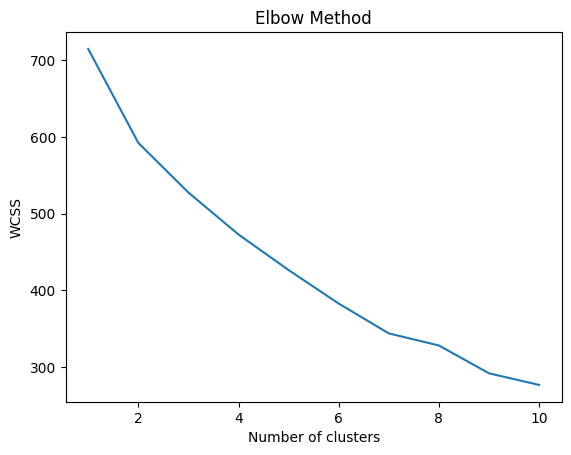

In [40]:
# Chọn các cột features để phân cụm
features = df_vn_features_M9[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 'duration_ms', 'time_signature']]

# Chuẩn hóa dữ liệu (để đảm bảo các cột có cùng thang đo)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Sử dụng elbow method để tìm số cụm tốt nhất
wcss = []
for i in range(1, 11):  # Thử các giá trị K từ 1 đến 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Vẽ biểu đồ đường cong khuỷu tay
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

In [48]:
# Sử dụng K-Means để phân cụm dữ liệu
kmeans = KMeans(n_clusters=7)  # Số lượng cụm có thể điều chỉnh theo nhu cầu
kmeans.fit(scaled_features)

# In thông tin về các cụm
cluster_centers = kmeans.cluster_centers_
print("Các điểm trung tâm của các cụm:")
print(cluster_centers)



Các điểm trung tâm của các cụm:
[[-0.63419118  0.36276671 -0.02892744  0.29299571  0.6387131   0.19250709
  -0.0755012  -0.17442018 -0.38106253 -0.61420752  0.67286697  0.8518862
   0.13608276]
 [-1.84817868 -1.29171004  0.08175146 -1.18344534 -0.25492496 -0.65466764
   1.5560826   0.08468685 -0.23339148 -1.09405755 -0.87377684  0.27859433
   0.13608276]
 [ 0.70243815  0.64538164  1.40067496  0.54994893 -1.05611771  0.88430743
  -1.23837936  7.24968512 -0.7291386  -0.57781777 -0.66228705 -0.23301745
   0.13608276]
 [ 0.52110253 -1.09080866  0.66281566 -1.10418131 -0.4398156  -0.37255385
   0.72891902 -0.10082498 -0.2440021  -0.22826424 -0.03644264 -0.51880639
   0.13608276]
 [-0.01274367  0.45940893 -0.826079    0.49906776  0.08844335 -0.22678287
  -0.4903491  -0.17826973  2.32238788  0.24299559  0.04543486  0.12641662
   0.13608276]
 [ 0.66911853  0.77189818 -0.29793864  0.74356156  0.01213928  0.48466744
  -0.75681036 -0.17791731 -0.38004136  0.91578698 -0.20353225 -0.3221294
   0.13

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3980\769672304.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vn_features_M9['cluster'] = kmeans.labels_


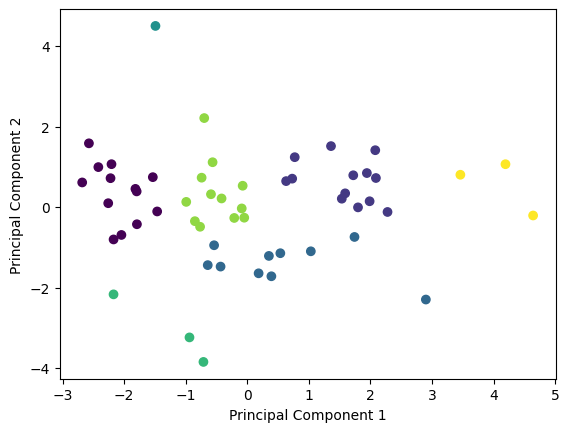

In [52]:
# Chuẩn hóa dữ liệu (để đảm bảo các cột có cùng thang đo)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Giảm chiều dữ liệu bằng PCA (chọn số thành phần chính cần giữ lại)
n_components = 2  # Số thành phần chính cần giữ lại
pca = PCA(n_components=n_components)
reduced_features = pca.fit_transform(scaled_features)

# Sử dụng K-Means để phân cụm dữ liệu sau khi đã giảm chiều
kmeans = KMeans(n_clusters=7)  # Số lượng cụm có thể điều chỉnh theo nhu cầu
kmeans.fit(reduced_features)

# Thêm cột mới 'cluster' vào DataFrame để lưu kết quả phân cụm
df_vn_features_M9['cluster'] = kmeans.labels_

# Vẽ biểu đồ dữ liệu phân cụm sau khi giảm chiều
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df_vn_features_M9['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()